In [1]:
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [3]:
! kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

/bin/bash: kaggle: command not found


In [ ]:
!unzip \*.zip

Archive:  Sample Project Reports and Template.zip
  inflating: Sample Project Reports and Template-20220127/annexure 1,2.pdf  
  inflating: Sample Project Reports and Template-20220127/ProjectTopics.txt  
  inflating: Sample Project Reports and Template-20220127/report sample.pdf  
  inflating: Sample Project Reports and Template-20220127/Sample 1.pdf  
  inflating: Sample Project Reports and Template-20220127/Sample 2.pdf  
  inflating: Sample Project Reports and Template-20220127/Sample 3.pdf  

Archive:  pdf2doc (2).zip
 extracting: R shine.doc             

Archive:  All_CPUs.zip
  inflating: All_CPUs.csv            

Archive:  sloria-TextBlob-0.16.0-0-g976441b.zip
976441bf5dbf3bb82a676ecff17e927548cb39a1
replace sloria-TextBlob-976441b/.coveragerc? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [31]:
import numpy as np
import pandas as pd

In [32]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [33]:
fake['target'] = 0
true['target'] = 1

In [34]:
fake.shape,true.shape

((23481, 5), (21417, 5))

In [35]:
# Combine the sub-datasets in one.
frames = [true.loc[:15000][:], fake.loc[:15000][:]]
df = pd.concat(frames)
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [36]:
X = df.drop('target', axis=1) 
y = df['target']
# Delete missing data
df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace=True)

In [37]:
df.shape

(30002, 5)

# **Plotting Co-Relation between Variables/Features**

In [38]:
df1=df.copy()

In [39]:
df1.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [40]:
df1['title']=df1['title'].astype('category').cat.codes
df1['text']=df1['text'].astype('category').cat.codes
df1['subject']=df1['subject'].astype('category').cat.codes
df1['target']=df1['target'].astype('category').cat.codes
df1['date']=df1['date'].astype('category').cat.codes
df1.corr()

,title,text,subject,date,target
title,1.000000,0.172279,0.682471,0.028916,0.572514
text,0.172279,1.000000,0.083634,0.022110,0.166219
subject,0.682471,0.083634,1.000000,0.020797,0.894962
date,0.028916,0.022110,0.020797,1.000000,0.041754
target,0.572514,0.166219,0.894962,0.041754,1.000000


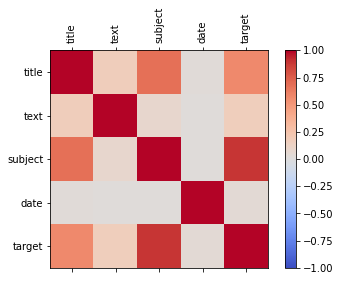

In [41]:
import matplotlib.pyplot as plt

corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()

# **Data Pre-Processing Steps**

---




### **Step 1 : Checking for Null or Missing Values in the dataset**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30002 entries, 0 to 15000
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    30002 non-null  object
 1   text     30002 non-null  object
 2   subject  30002 non-null  object
 3   date     30002 non-null  object
 4   target   30002 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [43]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

***By observing we can see that, there is no null or missing values in any columns of the dataset.***

In [44]:
df.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [45]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# **Shuffling the data to prevent bias**

In [46]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

In [47]:
df.head()

,title,text,subject,date,target
0,VOTE THEM OUT! SIX SENATE DEMOCRATS Up For Ree...,Florida Bill Nelson (D) Indiana Joe Donnelly (...,politics,"Feb 1, 2017",0
1,"France's Macron tells Iran, Israel leaders of ...",PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"November 21, 2017",1
2,WATCH: Sarah Silverman Hilariously Demolishes...,Adolf Hitler isn t enthused about being compar...,News,"March 11, 2016",0
3,Rachel Maddow Just Exposed The Worst Case Of ...,The game plan for Republicans isn t exactly di...,News,"March 26, 2016",0
4,U.N. says U.S. withdrawal from Paris deal 'maj...,UNITED NATIONS (Reuters) - The United States’ ...,politicsNews,"June 1, 2017",1


# **Data Exploration**

### How many articles per subject ?

subject
News             9050
politics         5951
politicsNews    11272
worldnews        3729
Name: text, dtype: int64


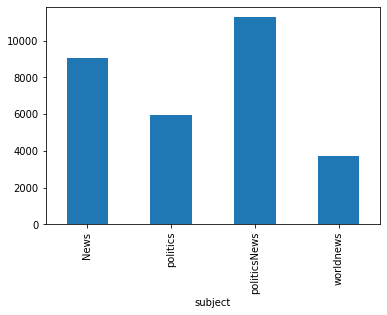

In [48]:
import matplotlib.pyplot as plt
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

### How many fake and real articles ?

target
0    15001
1    15001
Name: text, dtype: int64


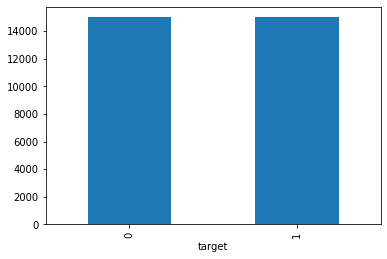

In [49]:
print(df.groupby(['target'])['text'].count())
df.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

## **Word Cloud for fake news:**

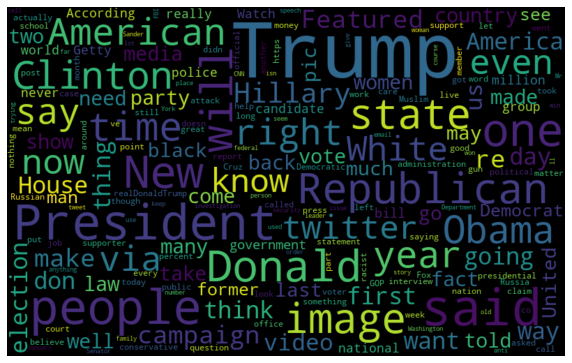

In [50]:
from wordcloud import WordCloud
fake_data = df[df["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Word Cloud for real news:**

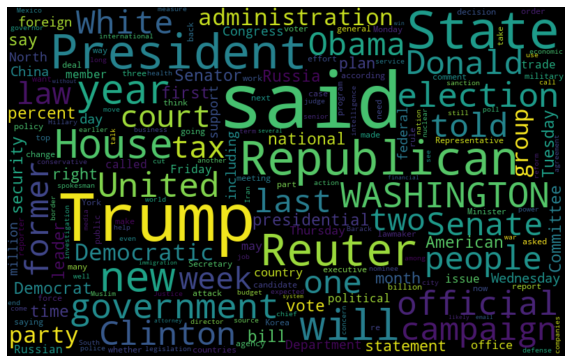

In [51]:
from wordcloud import WordCloud
real_data = df[df["target"] == 1]
all_words = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,
 collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


---




## **Text preprocessing** : includes deleting punctuations, lowering all capitalized characters, deleting all stopwords, and stemming, most of the time we call this process as Tokenization.

In [52]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[:5]

['washington reuter head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas non defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas non defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said meadow among republican vote late decemb parti 

## **Word CLoud For Corpus**


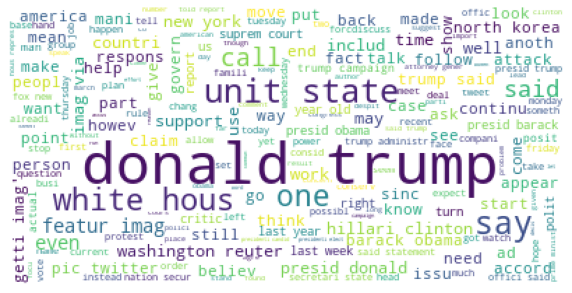

In [ ]:
# Generating Word Cloud
corp_str = str(corpus)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0,background_color="white").generate(corp_str)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Now, let’s use the TF-IDF vectorizer to convert each token to a vector, aka, vectorize tokens or word embedding.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=1500,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['target']

### **Splitting The Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Model training and validation**

## **Applying Gausian Naive Bayes**

In [ ]:
# Fitting Gausian Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()

# Fitting the model
model3 = nb.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred3 = model3.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred3)*100,4)))

accuracy: 93.801%


In [ ]:
# Making the Classification Report
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(classification_report(y_test, y_pred3))

print(accuracy_score(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2993
           1       0.92      0.96      0.94      3008

    accuracy                           0.94      6001
   macro avg       0.94      0.94      0.94      6001
weighted avg       0.94      0.94      0.94      6001

0.9380103316113981


In [ ]:
# Making the Confusion Matrix
cm3= confusion_matrix(y_test,y_pred3)  
cm3

array([[2728,  265],
       [ 107, 2901]])

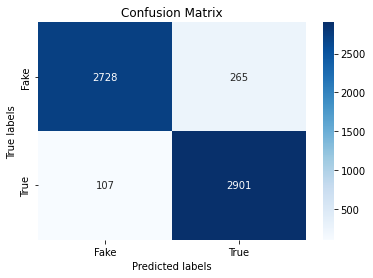

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
sns.heatmap(cm3, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Fake','True']); 
ax.yaxis.set_ticklabels(['Fake','True']);

In [ ]:
# Area Under the Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)

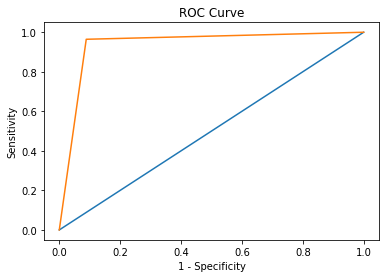

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()



In [ ]:
# Area Under the Curve
roc_auc_score(y_test, y_pred3)

0.937944132497103

## **Applying Logistic Regression**

In [ ]:
# Fitting the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1 = lr.fit(X_train, y_train)


In [ ]:
# Accuracy
y_pred1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred1)*100,2)))

accuracy: 98.67%


In [ ]:
# Making the Classification Report
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(classification_report(y_test,y_pred1))

print(accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2993
           1       0.98      0.99      0.99      3008

    accuracy                           0.99      6001
   macro avg       0.99      0.99      0.99      6001
weighted avg       0.99      0.99      0.99      6001

0.9866688885185803


In [ ]:
# Making the Confusion Matrix
cm1= confusion_matrix(y_test,y_pred1)  
cm1  

array([[2941,   52],
       [  28, 2980]])

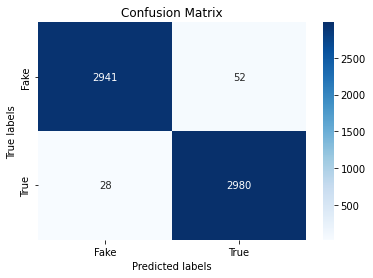

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
sns.heatmap(cm1, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Fake','True']); 
ax.yaxis.set_ticklabels(['Fake','True']);

In [ ]:
# Area Under the Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

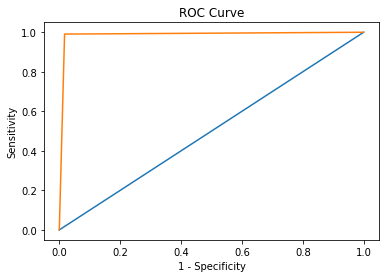

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Area Under the Curve
roc_auc_score(y_test, y_pred1)*100

98.66588084964208

## **Applying Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

rf= RandomForestClassifier(n_estimators=50, criterion="gini")


#Fitting Model Random Forest
model2 = rf.fit(X_train, y_train)

In [ ]:
y_pred2 = model2.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred2)*100,4)))

accuracy: 99.7%


In [ ]:
# Making the Classification Report
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(classification_report(y_test,y_pred2))

print(accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2993
           1       1.00      1.00      1.00      3008

    accuracy                           1.00      6001
   macro avg       1.00      1.00      1.00      6001
weighted avg       1.00      1.00      1.00      6001

0.9965005832361273


In [ ]:
# Making the Confusion Matrix
cm2= confusion_matrix(y_test,y_pred2)  
cm2

array([[2981,   12],
       [   9, 2999]])

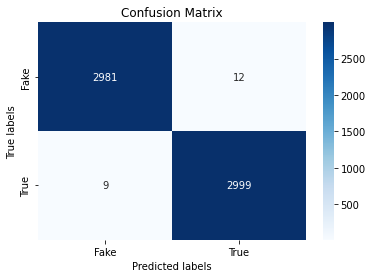

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
sns.heatmap(cm2, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Fake','True']); 
ax.yaxis.set_ticklabels(['Fake','True']);

In [ ]:
# Area Under the Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

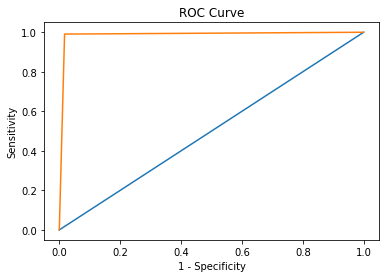

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()



In [ ]:
# Area Under the Curve
roc_auc_score(y_test, y_pred2)

0.9964993117806797

In [ ]:
# Tokenization
df=("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)
review = re.sub('[^a-zA-Z]', ' ', df)
review = review.lower()
review = review.split() 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
# Vectorization
val = tfidf_v.transform([review]).toarray()
# Predict 
model2.predict(val)

array([0])

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(newsa):
    review = re.sub('[^a-zA-Z]', ' ', newsa)
    review = review.lower()
    review = review.split() 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    # Vectorization
    val = tfidf_v.transform([review]).toarray()
    # Predict 
    pred_RF=model2.predict(val)
    return print("\nRF Prediction: {}".format(output_lable(pred_RF[0])))

In [ ]:
#newsa = str(input())
manual_testing("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)


RF Prediction: Fake News


In [ ]:
import pickle
pickle.dump(model2, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

NameError: ignored

In [ ]:
# Load model and vectorizer
import pickle
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
pred_RF=joblib_model.predict(val_pkl)
print("\nRF Prediction: {}".format(output_lable(pred_RF[0])))

FileNotFoundError: ignored